In [22]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# graph-ufs predictions
ds_pred = xr.open_zarr("zarr-stores/graphufs_predictions.zarr/")
ds_pred

<xarray.Dataset> Size: 13MB
Dimensions:                  (time: 121, lead_time: 1, longitude: 64,
                              latitude: 32, level: 3, z_l: 3)
Coordinates:
  * latitude                 (latitude) float64 256B -87.19 -81.56 ... 87.19
  * lead_time                (lead_time) timedelta64[ns] 8B 06:00:00
  * level                    (level) float32 12B 100.0 500.0 1e+03
  * longitude                (longitude) float64 512B 0.0 5.625 ... 348.8 354.4
  * time                     (time) datetime64[ns] 968B 1995-01-01 ... 1995-0...
  * z_l                      (z_l) float64 24B 0.5154 47.36 200.3
Data variables:
    10m_u_component_of_wind  (time, lead_time, longitude, latitude) float32 991kB dask.array<chunksize=(61, 1, 32, 32), meta=np.ndarray>
    10m_v_component_of_wind  (time, lead_time, longitude, latitude) float32 991kB dask.array<chunksize=(61, 1, 32, 32), meta=np.ndarray>
    SSH                      (time, lead_time, longitude, latitude) float32 991kB dask.array<chunksize=(61, 1, 32, 32), meta=np.ndarray>
    so                       (time, lead_time, z_l, longitude, latitude) float32 3MB dask.array<chunksize=(61, 1, 2, 32, 32), meta=np.ndarray>
    surface_pressure         (time, lead_time, longitude, latitude) float32 991kB dask.array<chunksize=(61, 1, 32, 32), meta=np.ndarray>
    temp                     (time, lead_time, z_l, longitude, latitude) float32 3MB dask.array<chunksize=(61, 1, 2, 32, 32), meta=np.ndarray>
    temperature              (time, lead_time, level, longitude, latitude) float32 3MB dask.array<chunksize=(61, 1, 2, 32, 32), meta=np.ndarray>
Attributes:
    regrid_method:  conservative

In [6]:
# targets
ds_tar = xr.open_zarr("zarr-stores/graphufs_targets.zarr/")
ds_tar

<xarray.Dataset> Size: 13MB
Dimensions:                  (time: 121, lead_time: 1, longitude: 64,
                              latitude: 32, level: 3, z_l: 3)
Coordinates:
  * latitude                 (latitude) float64 256B -87.19 -81.56 ... 87.19
  * lead_time                (lead_time) timedelta64[ns] 8B 06:00:00
  * level                    (level) float32 12B 100.0 500.0 1e+03
  * longitude                (longitude) float64 512B 0.0 5.625 ... 348.8 354.4
  * time                     (time) datetime64[ns] 968B 1995-01-01 ... 1995-0...
  * z_l                      (z_l) float64 24B 0.5154 47.36 200.3
Data variables:
    10m_u_component_of_wind  (time, lead_time, longitude, latitude) float32 991kB dask.array<chunksize=(61, 1, 32, 32), meta=np.ndarray>
    10m_v_component_of_wind  (time, lead_time, longitude, latitude) float32 991kB dask.array<chunksize=(61, 1, 32, 32), meta=np.ndarray>
    SSH                      (time, lead_time, longitude, latitude) float32 991kB dask.array<chunksize=(61, 1, 32, 32), meta=np.ndarray>
    so                       (time, lead_time, z_l, longitude, latitude) float32 3MB dask.array<chunksize=(61, 1, 2, 32, 32), meta=np.ndarray>
    surface_pressure         (time, lead_time, longitude, latitude) float32 991kB dask.array<chunksize=(61, 1, 32, 32), meta=np.ndarray>
    temp                     (time, lead_time, z_l, longitude, latitude) float32 3MB dask.array<chunksize=(61, 1, 2, 32, 32), meta=np.ndarray>
    temperature              (time, lead_time, level, longitude, latitude) float32 3MB dask.array<chunksize=(61, 1, 2, 32, 32), meta=np.ndarray>
Attributes:
    regrid_method:  conservative

### SSH

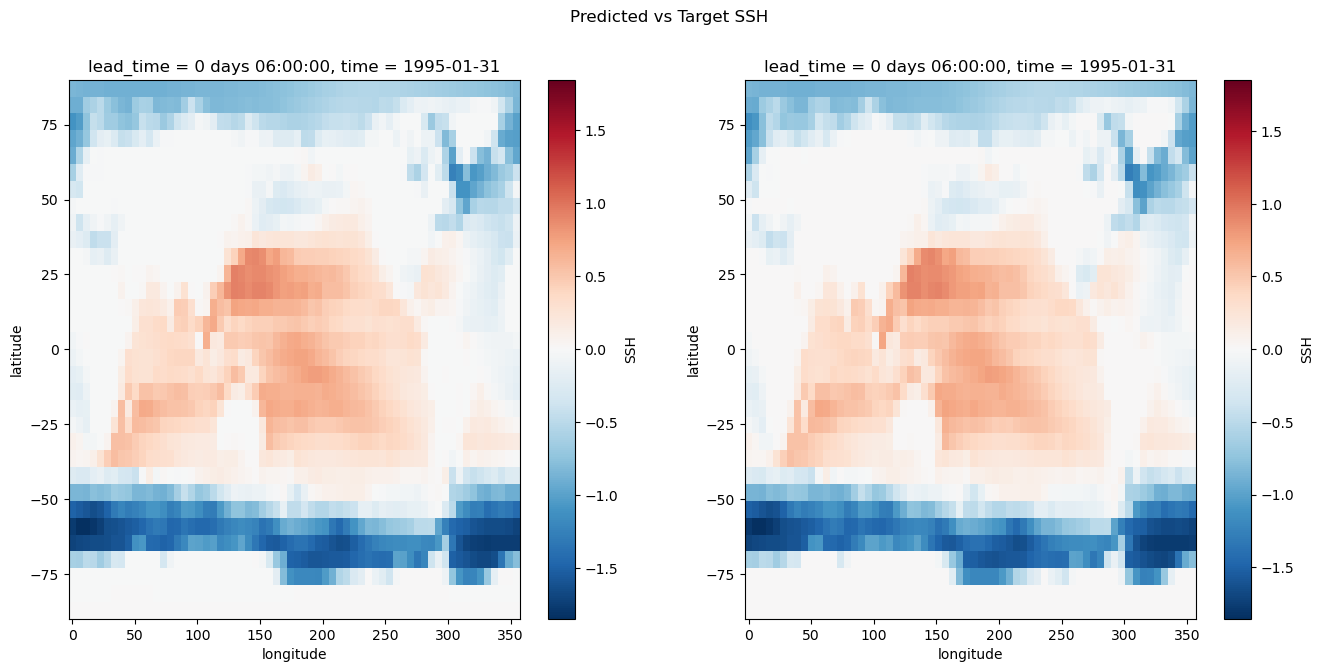

In [27]:
fig, ax = plt.subplots(1,2, figsize=(16,7))
ds_pred.SSH.isel(time=-1, lead_time=0).transpose().plot(ax=ax[0])
ds_tar.SSH.isel(time=-1, lead_time=0).transpose().plot(ax=ax[1])
plt.suptitle('Predicted vs Target SSH')
plt.show()

In [25]:
err = ds_pred.SSH.isel(time=-1, lead_time=0).values - ds_tar.SSH.isel(time=-1, lead_time=0).values
print("RMSE Error:", np.sqrt(np.mean(err**2)))

RMSE Error: 0.015731882


### Temp

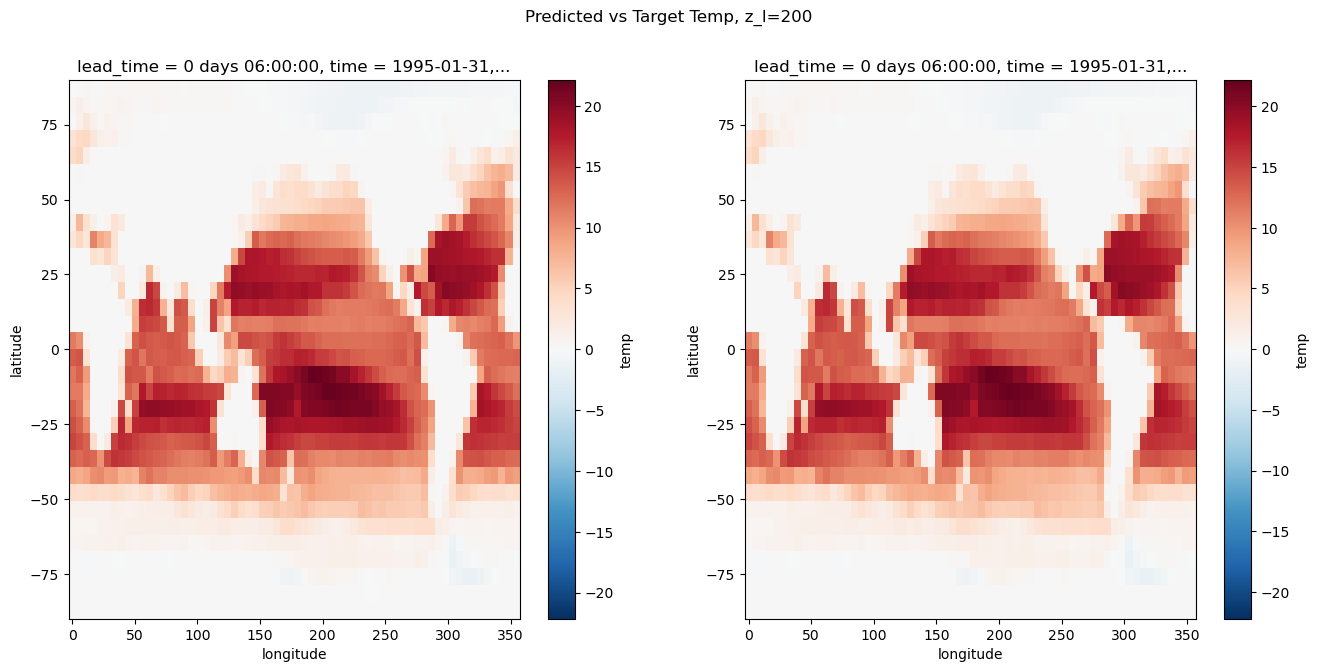

In [31]:
depth = 200
fig, ax = plt.subplots(1,2, figsize=(16,7))
ds_pred.temp.isel(time=-1, lead_time=0).sel(z_l=depth, method='nearest').transpose().plot(ax=ax[0])
ds_tar.temp.isel(time=-1, lead_time=0).sel(z_l=depth, method='nearest').transpose().plot(ax=ax[1])
plt.suptitle(f'Predicted vs Target Temp, z_l={depth}')
plt.show()